# Data Exploration Basics: Visualize Earnings Based on College Majors with Maplotlib and Seaborn

In that project I'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github [repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).
The dataset was used [in that report](https://cew.georgetown.edu/wp-content/uploads/2014/11/whatsitworth-complete.pdf).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

 - `Rank` - Rank by median earnings (the dataset is ordered by this column).
 - `Major_code` - Major code.
 - `Major` - Major description.
 - `Major_category` - Category of major
 - `Total` - Total number of people with major.
 - `Sample_size` - Sample size (unweighted) of respondents
 - `Men` - Male graduates.
 - `Women` - Female graduates.
 - `ShareWomen` - Women as share of total.
 - `Employed` - Number employed.
 - `Median` - Median salary of full-time, year-round workers.
 - `Low_wage_jobs` - Number in low-wage service jobs.
 - `Full_time` - Number employed 35 hours or more.
 - `Part_time` - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- *Do students in more popular majors earn more money?* - Using scatter plots
- *How many majors are predominantly male? Predominantly female?* - Using histograms
- *Which category of majors have the most students?* - Using bar plots

First step is to import the libraries we need and clean the data.

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 14})

grads = pd.read_csv('recent-grads.csv')

In [2]:
grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [5]:
# delete a row with null value
grads = grads.dropna()
print(len(grads.index))

172


In [46]:
# sample size vs total ratio

grads_total = grads['Total'].sum()
grads_sample = grads['Sample_size'].sum()
print ("Graduated Total: {:,}.  Sample Size: {:,}. Ratio: {:.2%} ".format(
        grads_total, grads_sample,
        (grads_sample/grads_total)*100))

Graduated Total: 6,771,654.0.  Sample Size: 61,566. Ratio: 90.92% 


## Do students in more popular majors earn more money?

<AxesSubplot:title={'center':'Median salary vs Sample size'}, xlabel='Sample_size', ylabel='Median'>

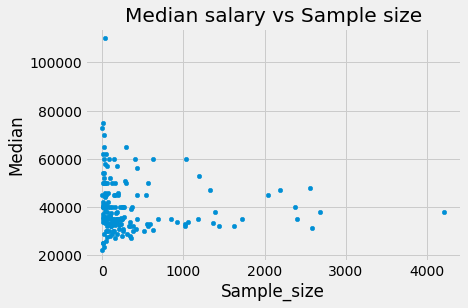

In [7]:
# plot median salary vs sample sizes
grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median salary vs Sample size')

<AxesSubplot:title={'center':'Unemployment Rate vs Sample size'}, xlabel='Sample_size', ylabel='Unemployment_rate'>

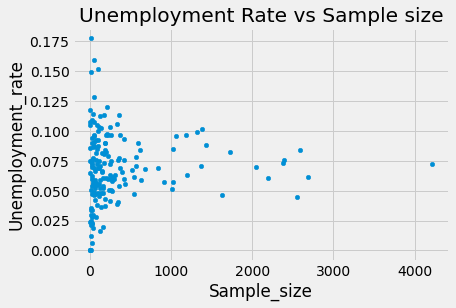

In [8]:
# plot umemployment rate vs sample size
grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment Rate vs Sample size')

Two scatterplots show that people with most popular majors tend to earn close to median salary which suits good central limit theory. The same situation happens with unemployment rate.

<AxesSubplot:title={'center':'Full-time employed vs Median salary'}, xlabel='Full_time', ylabel='Median'>

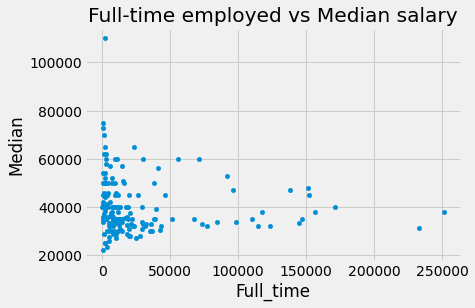

In [9]:
# plot full-time employed vs median salary
grads.plot(x='Full_time', y='Median', kind='scatter', title='Full-time employed vs Median salary')


## *Is there any link between the number of full-time employees and median salary?*

There is no certain correlation between number of working hours and median salary, but it is better to analyze it in regard to shares not totals.

<AxesSubplot:title={'center':'Median salary for male employers'}, xlabel='Median', ylabel='Men'>

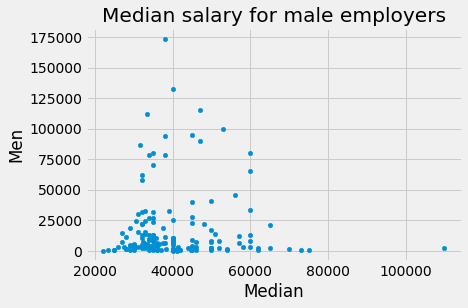

In [10]:
# plot male vs median salary
grads.plot(x='Median', y='Men', kind='scatter', title='Median salary for male employers')

<AxesSubplot:title={'center':'Median salary for female employers'}, xlabel='Median', ylabel='Women'>

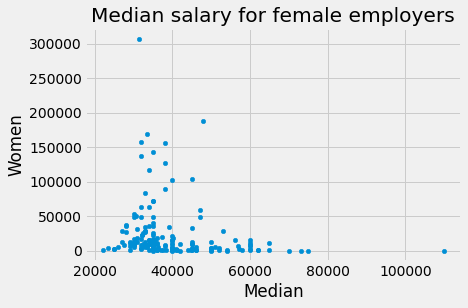

In [11]:
# plot female vs median salary
grads.plot(x='Median', y='Women', kind='scatter', title='Median salary for female employers')

Do students that majored in subjects that were majority female make more money?
There are more predominantly female majors with median salary below average, predominantly male majors located in area with higher salaries.

<AxesSubplot:>

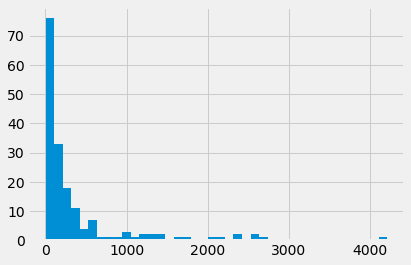

In [12]:
grads['Sample_size'].hist(bins=40)

<AxesSubplot:>

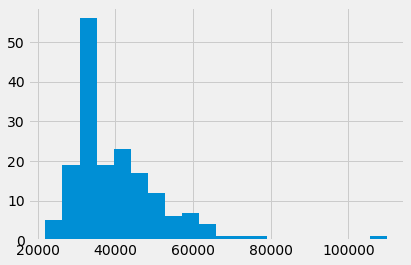

In [13]:
grads['Median'].hist(bins=20)

<AxesSubplot:>

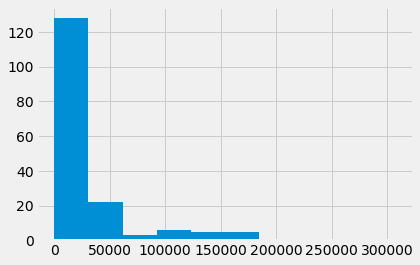

In [14]:
grads['Employed'].hist(bins=10)

<AxesSubplot:>

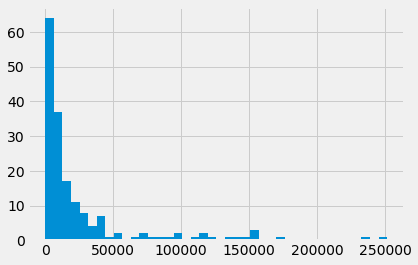

In [15]:
grads['Full_time'].hist(bins=40)

<AxesSubplot:>

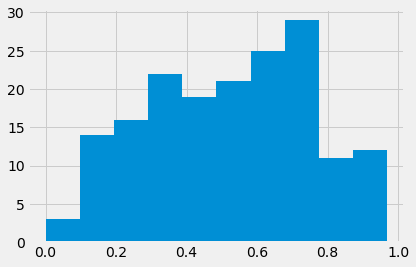

In [16]:
grads['ShareWomen'].hist(bins=10)

<AxesSubplot:>

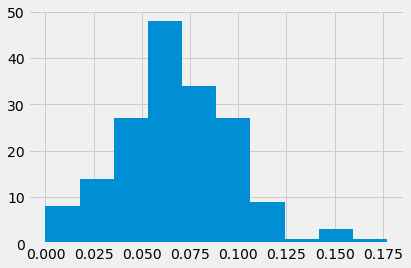

In [17]:
grads['Unemployment_rate'].hist(bins=10)

<AxesSubplot:>

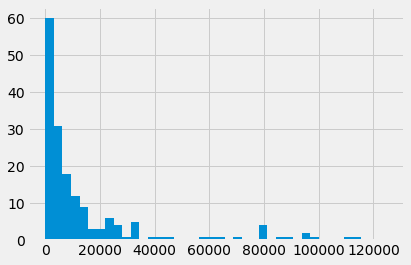

In [18]:
grads['Men'].hist(bins=40, range=(0, 125000))

<AxesSubplot:>

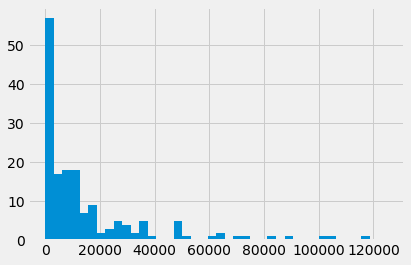

In [19]:
grads['Women'].hist(bins=40, range=(0, 125000))

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

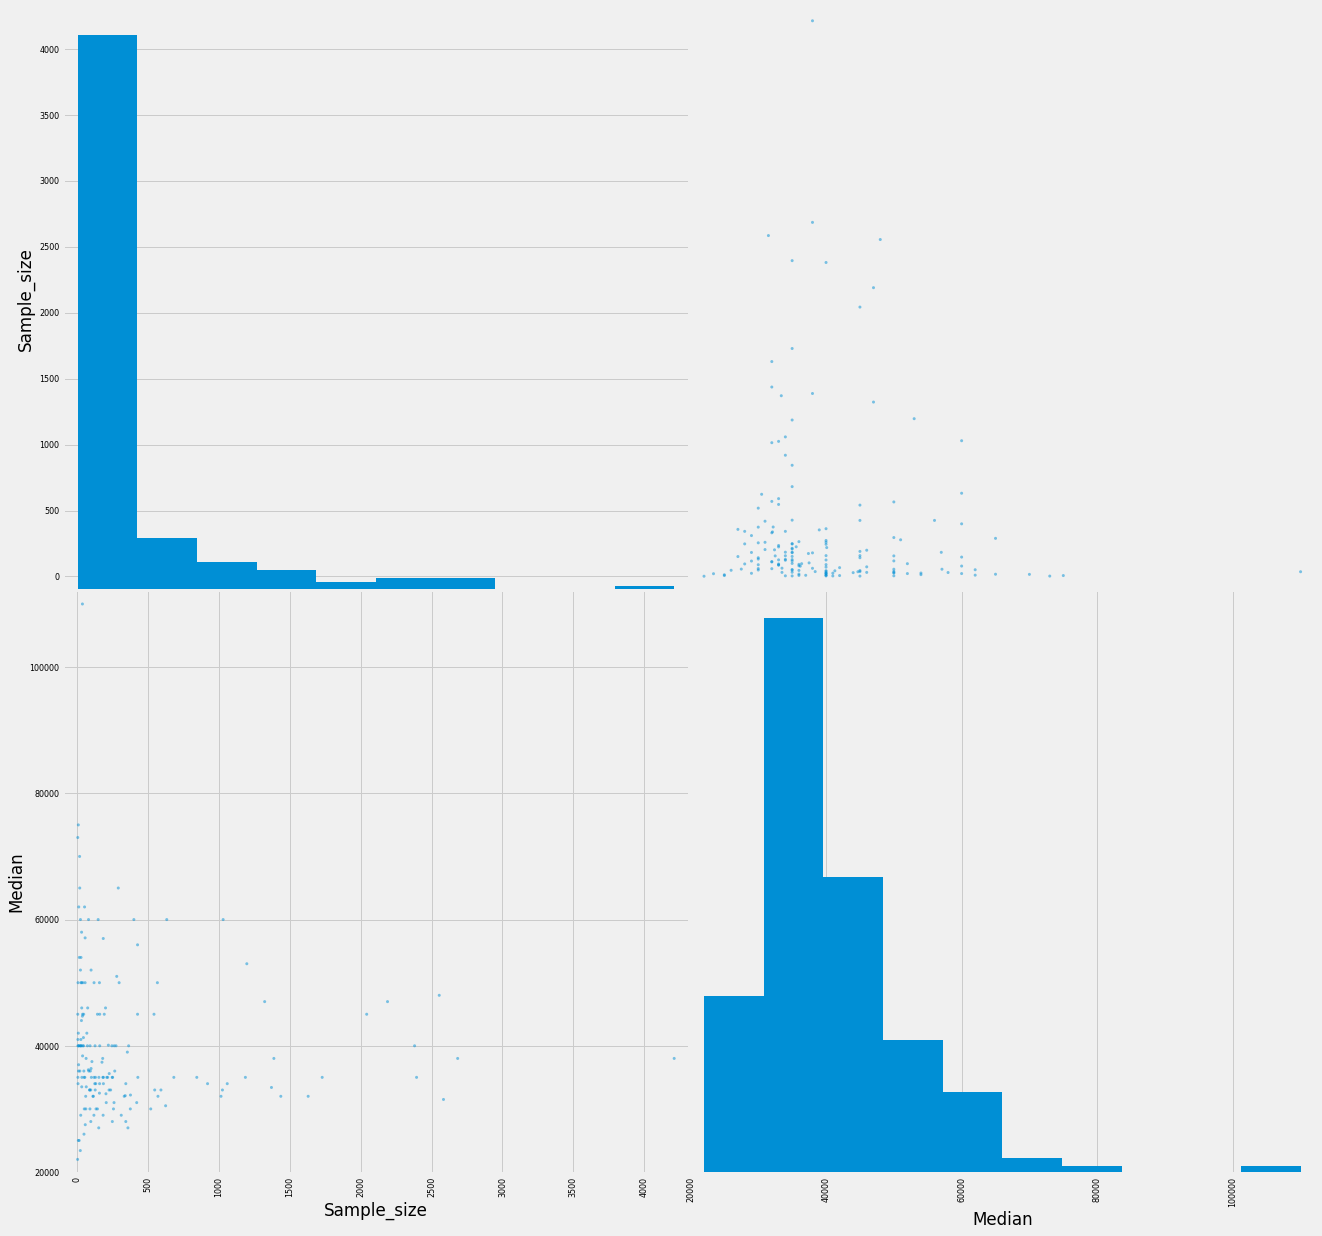

In [20]:
from pandas.plotting import scatter_matrix 
scatter_matrix(grads[['Sample_size', 'Median']], figsize=(20, 20))

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

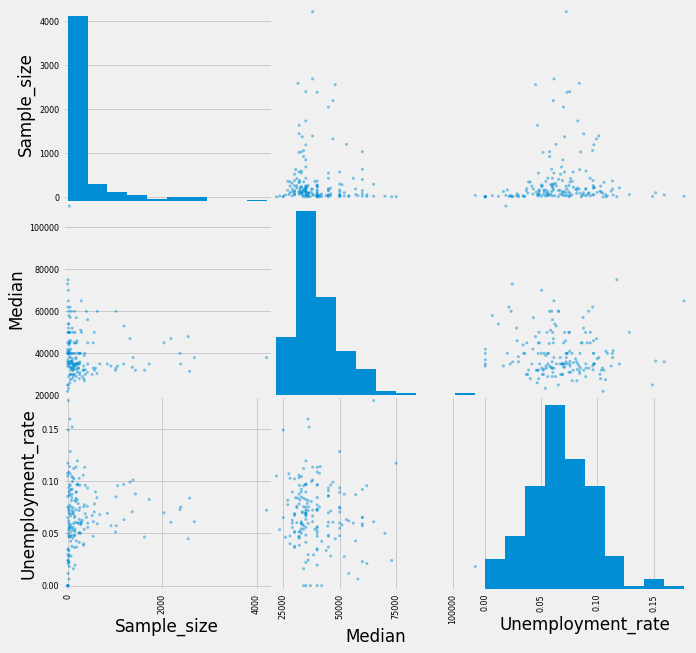

In [21]:
scatter_matrix(grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10, 10))

<AxesSubplot:>

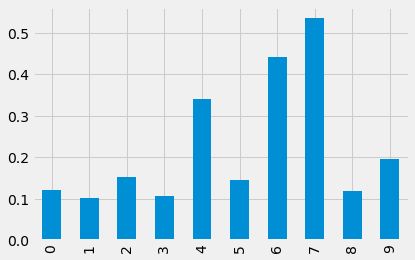

In [22]:
grads[:10]['ShareWomen'].plot(kind='bar')

<AxesSubplot:>

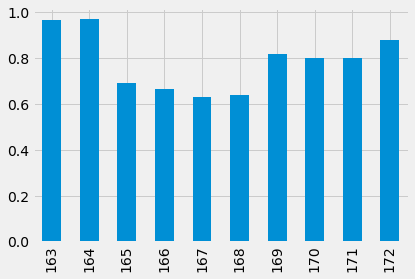

In [23]:
grads[-10:]['ShareWomen'].plot(kind='bar')

<AxesSubplot:>

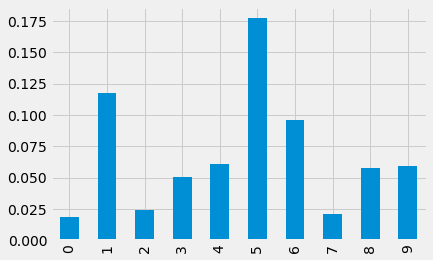

In [24]:
grads['Unemployment_rate'][:10].plot(kind='bar')

<AxesSubplot:>

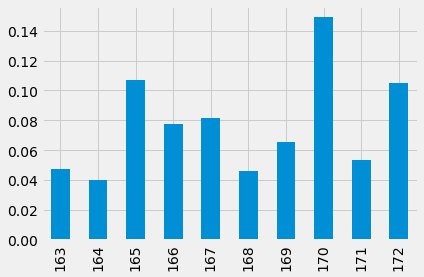

In [25]:
grads['Unemployment_rate'][-10:].plot(kind='bar')

Next step is to look more thoroughly at major categories and understand if there is a difference between them in regards of gender diversity, mean salaries and unemployment rates.

In [26]:
# create new dataset on gender diversity grouped by category
grads_group = grads.groupby(grads['Major_category'])[['Men', 'Women']].sum()
#grads_group['Total'] = grads_group['Men']+grads_group['Women']
grads_group.sort_values(by='Women', ascending=True, inplace=True)

## Create a violin plot

<AxesSubplot:title={'center':'Male vs female students in major categories'}, ylabel='Major_category'>

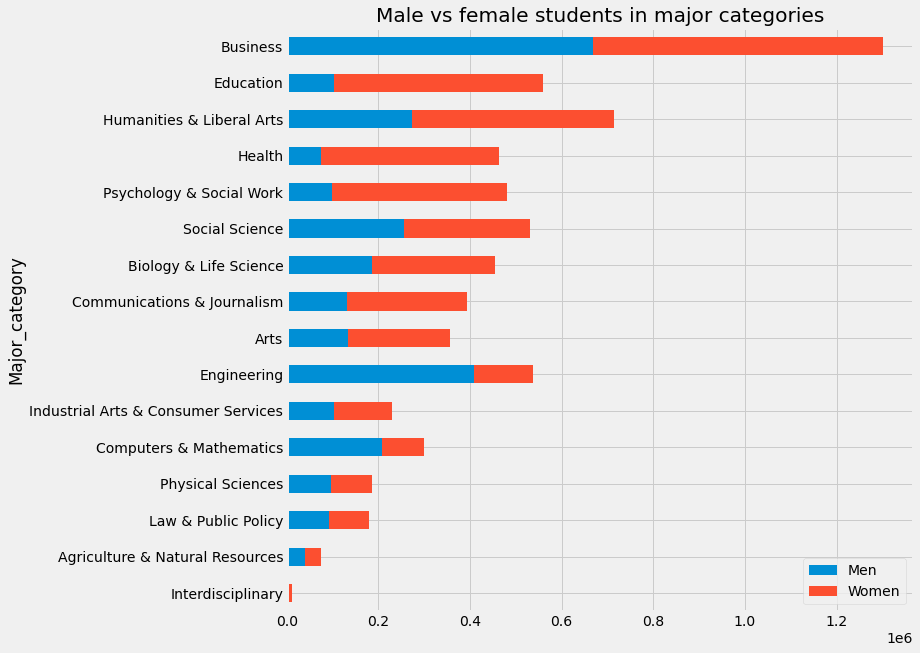

In [27]:
# create horisontal stacked bar plot
grads_group.plot(kind="barh", stacked=True, figsize=(10, 10), title='Male vs female students in major categories')

In [1]:
top_5_w = grads_group['Women'].nlargest(5)
print(top_5_w)
top_5_w.plot.pie(figsize=(5, 5), title='Top-5 major categories among female students')

NameError: name 'grads_group' is not defined

In [ ]:
top_5_m = grads_group['Men'].nlargest(5)
print(top_5_m)
top_5_m.plot.pie(figsize=(5, 5), title='Top-5 major categories among male students')

As we can see there are clearly major categories prefered by women: Humanities&Liberal Arts, Health, Education, Psychology&Social Work. Some majors are dominated by male students: Engeneering, Computers&Mathematics. What is interesting, among the largest category, Business male students prevail very little.

## Median salary by major category

In [28]:
# create new dataset on median salary grouped by category
grads_group_2 = grads.groupby(grads['Major_category'])[['Median', 'Employed']].mean()
grads_group_2.sort_values(by='Median', ascending=True, inplace=True)

<AxesSubplot:title={'center':'Median'}, xlabel='Major_category'>

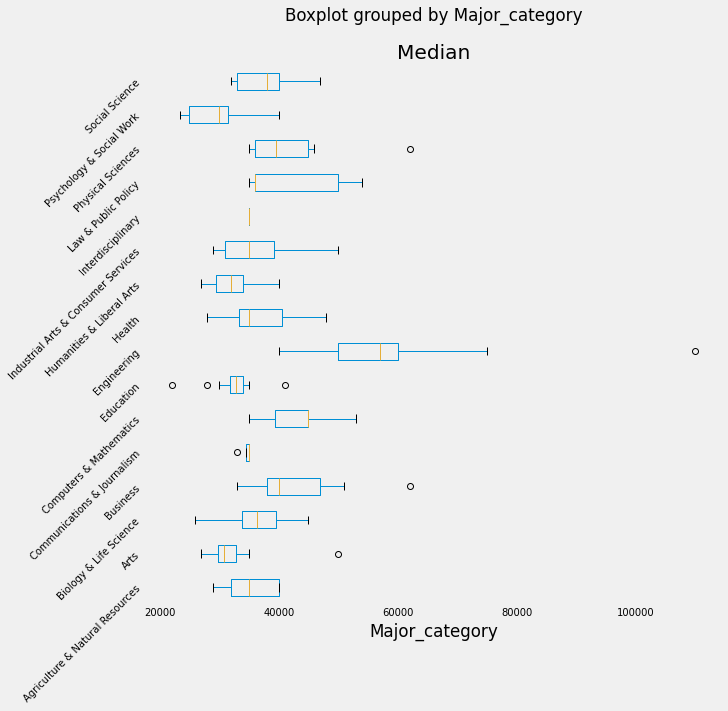

In [29]:
# create boxplot on median salaries
grads.boxplot(column = 'Median', by='Major_category', grid=False, rot=45, vert= False, figsize= (10, 10), fontsize=10)

Top majors in regards to median salary are from Engineering, Law&Public Policy and Business categories.

## Unemployment rates by major category

<AxesSubplot:title={'center':'Unemployment_rate'}, xlabel='Major_category'>

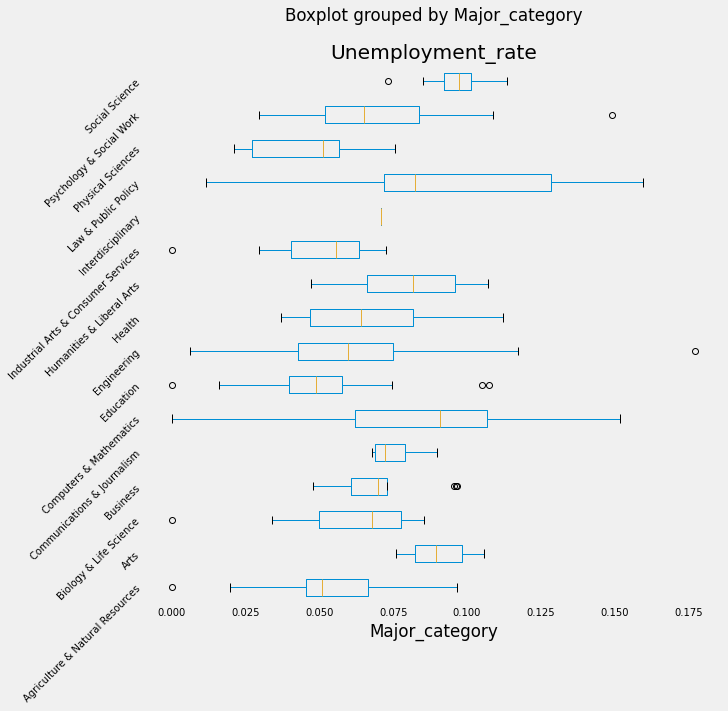

In [30]:
#create boxplot on unemployment
grads.boxplot(column = 'Unemployment_rate', by='Major_category', grid=False, rot=45, vert= False, figsize= (10, 10), fontsize=10)

Surprizingly there highest values of enemployment can be found in categories with high salaries: Computers&Matemathics and Law&Public Policy as well as in categories with traditionally high unemployment rates like Liberal Arts and Arts.
It can be explained either with highly competitive nature of public service or with large range of probable project work for students from Computers&Mathematics. 

Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

## Explore density

<AxesSubplot:xlabel='Women', ylabel='Unemployment_rate'>

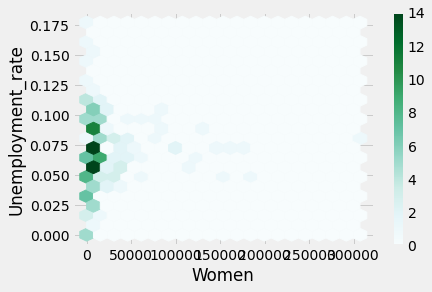

In [31]:
# hex bin plot Women vs Unemployment rate
grads.plot.hexbin(x='Women', y='Unemployment_rate', gridsize=20)

<AxesSubplot:xlabel='Men', ylabel='Unemployment_rate'>

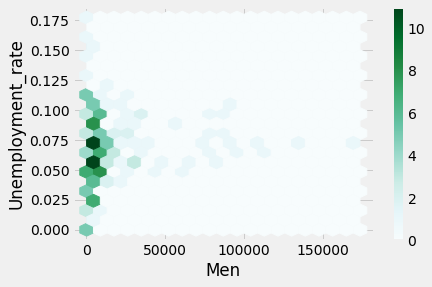

In [32]:
# hex bin plot Men vs Unemployment rate
grads.plot.hexbin(x='Men', y='Unemployment_rate', gridsize=20)

There is no difference in most occuring unemployment rates between male and female alumni. Next step is to examine if there is a difference in most occuring median salaries.

<AxesSubplot:xlabel='Women', ylabel='Median'>

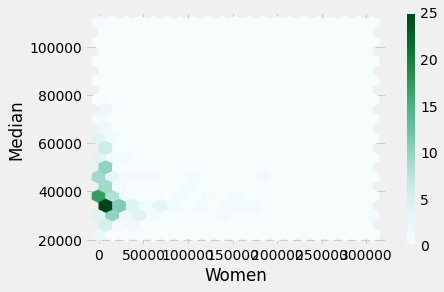

In [33]:
# hex bin plot Women vs Median salary
grads.plot.hexbin(x='Women', y='Median', gridsize=20)

<AxesSubplot:xlabel='Men', ylabel='Median'>

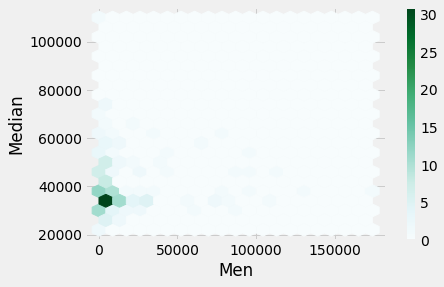

In [34]:
# hex bin plobt Men vs Median salary
grads.plot.hexbin(x='Men', y='Median', gridsize=20)

Hex bin plots on median salary showed that among female employers it was even more often to get close to $40000 salary.